In [9]:

#API sur le site:https://pro.coinmarketcap.com

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
    #limit le nombre de data download
    'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '2dc81ff2-e26a-4719-9c19-406e88664035',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-05-04T17:30:08.951Z', 'error_code': 0, 'error_message': None, 'elapsed': 1771, 'credit_count': 1, 'notice': None, 'total_count': 9871}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11023, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'pa

In [2]:
type(data)

dict

In [42]:
import pandas as pd
#lecture des colonnes et des lignes
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)



In [25]:
#Normalise les donnes et make it pretty in dataframe
df=pd.json_normalize(data['data'])
df['timeStamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timeStamp
0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969399e+07,1.969399e+07,False,NaN,1,NaN,NaN,None,2024-05-04T17:28:00.000Z,63408.347504,2.436732e+10,-23.5465,-0.187510,2.465629,0.820892,-6.566107,-1.719359,47.919448,1.248763e+12,53.2846,1.331575e+12,None,2024-05-04T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 17:50:55.067562
1,1027,Ethereum,ETH,ethereum,8895,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201081e+08,1.201081e+08,True,NaN,2,NaN,NaN,None,2024-05-04T17:27:00.000Z,3118.638534,9.220499e+09,-28.2121,-0.066450,1.470704,-1.644288,-7.647680,-14.522009,35.609202,3.745738e+11,15.9774,3.745738e+11,None,2024-05-04T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 17:50:55.067562
2,825,Tether USDt,USDT,tether,84634,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.107691e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-04T17:27:00.000Z,1.000593,4.403755e+10,-16.1987,0.034296,0.022794,0.134931,0.000996,0.082274,0.093945,1.108348e+11,4.7277,1.131536e+11,None,2024-05-04T17:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-04 17:50:55.067562
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475875e+08,1.475875e+08,False,NaN,4,NaN,NaN,None,2024-05-04T17:27:00.000Z,587.176419,6.277638e+08,-24.6103,-0.491373,1.236064,-0.244098,-1.267659,45.045798,92.150628,8.665988e+10,3.6924,8.665988e+10,None,2024-05-04T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 17:50:55.067562
4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.473260e+08,5.752296e+08,True,NaN,5,NaN,NaN,None,2024-05-04T17:27:00.000Z,145.751546,2.995209e+09,-8.0062,-0.191125,2.637030,5.240384,-22.082848,10.967405,50.084522,6.519845e+10,2.7810,8.384061e+10,None,2024-05-04T17:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 17:50:55.067562
5,3408,USDC,USDC,usd-coin,18867,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.356713e+10,3.356713e+10,False,NaN,6,NaN,NaN,None,2024-05-04T17:27:00.000Z,1.000452,5.943128e+09,-16.6546,0.034877,0.042422,0.058919,0.040042,0.072978,0.031532,3.358230e+10,1.4325,3.358230e+10,None,2024-05-04T17:27:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-04 17:50:55.067562
6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,None,2024-05-04T17:28:00.000Z,0.532151,7.868909e+08,-29.3879,-0.543438,0.951595,3.007967,-11.630336,-14.256887,4.112415,2.939383e+10,1.2538,5.321507e+10,None,2024-05-04T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 17:50:55.067562
7,74,Dogecoin,DOGE,dogecoin,961,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.441542e+11,1.441542e+11,True,NaN,8,NaN,NaN,None,2024-05-04T17:28:00.000Z,0.158777,2.749483e+09,135.7772,-2.216965,13.327918,8.568947,-13.533519,-1.143917,99.786904,2.288839e+10,0.9754,2.288839e+10,None,2024-05-04T17:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 17:50:55.067562
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.473225e

In [46]:
#fonction api_runner due à la limite fixe a 20 prend importer les 20 premiers datasets 
#global df 
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
        #limit le nombre de data download
        'limit':'20',
      'convert':'USD'
        }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '2dc81ff2-e26a-4719-9c19-406e88664035',
        }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
     # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
#df affecter les datas par pd.jsonnormalize(data['nom_variable']
# df['timeStamp']=pd.to_datetime('now') cree une nouvelle colonne timeStamp avec l'heure à cet instant
    df=pd.json_normalize(data['data'])
    df['timeStamp']=pd.to_datetime('now')
    df 
    #dans le cas ou le fichier Api n'existe pas creer le ou sinon lis le
    
    if not os.path.isfile(r'C:\Users\hp\Desktop\projectPython\my_own_project\Api.csv'):
        df.to_csv(r'C:\Users\hp\Desktop\projectPython\my_own_project\Api.csv',header='column_names')
    else:
          df.to_csv(r'C:\Users\hp\Desktop\projectPython\my_own_project\Api.csv',mode='a',header=False)
        



In [47]:
#appel la fonction api_runner chq minute 
import os 
from time import time
from time import sleep
#333 car c'est le nombre max que l'api t'autorise 
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()


API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [48]:
#lecutre du fichier avec pandas
my_df=pd.read_csv(r'C:\Users\hp\Desktop\projectPython\my_own_project\Api.csv')

In [50]:
my_df.describe()

,Unnamed: 0,id,num_market_pairs,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,platform.id
count,120.000000,120.000000,120.000000,4.800000e+01,1.200000e+02,1.200000e+02,0.0,120.000000,1.800000e+01,1.800000e+01,0.0,120.000000,1.200000e+02,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,1.200000e+02,0.0,30.000000
mean,9.500000,3481.150000,6951.600000,1.960522e+10,2.948872e+13,2.950350e+13,NaN,10.500000,2.517909e+10,1.145902e+10,NaN,3402.133169,4.711340e+09,-6.704723,-0.042328,1.779898,1.407535,-12.029864,0.634196,46.544240,1.053283e+11,4.491344,1.134728e+11,NaN,2604.800000
std,5.790459,3178.154233,18478.888498,3.399300e+10,1.289656e+14,1.290185e+14,NaN,5.790459,3.384229e+10,5.919058e+09,NaN,13873.819551,1.058468e+10,37.186464,0.264545,3.407280,3.555171,10.865689,34.905351,62.053629,2.762456e+11,11.779825,2.926935e+11,NaN,3209.545788
min,0.000000,1.000000,236.000000,2.100000e+07,1.969399e+07,1.969399e+07,NaN,1.000000,4.634512e+08,6.134247e+09,NaN,0.000025,1.070497e+08,-36.999500,-0.813213,-4.158821,-6.739558,-28.481117,-35.880762,-22.401224,6.111528e+09,0.260600,6.859198e+09,NaN,1027.000000
25%,4.750000,976.500000,745.250000,6.825000e+07,3.221376e+08,3.661549e+08,NaN,5.750000,4.634513e+08,6.138154e+09,NaN,0.682902,2.488411e+08,-24.010625,-0.148123,-0.001197,-0.474381,-21.021774,-16.509064,1.284976,8.960070e+09,0.382050,1.016295e+10,NaN,1027.000000
50%,9.500000,1992.500000,1065.500000,8.578744e+08,1.253245e+09,1.313517e+09,NaN,10.500000,3.414167e+09,8.792148e+09,NaN,7.025126,3.637273e+08,-16.262900,-0.023173,1.144322,1.097516,-12.642647,-8.127765,13.859874,1.574932e+10,0.671650,2.203688e+10,NaN,1027.000000
75%,14.250000,5852.250000,1844.250000,1.875000e+10,4.054828e+10,4.951166e+10,NaN,15.250000,7.165966e+10,1.943910e+10,NaN,98.128516,2.853368e+09,-7.156325,0.025429,3.016152,3.104293,-1.228452,2.226500,93.175007,4.152464e+10,1.770900,6.103398e+10,NaN,1027.000000
max,19.000000,11419.000000,84636.000000,1.000000e+11,5.892894e+14,5.895341e+14,NaN,20.000000,7.165966e+10,1.945907e+10,NaN,63585.362230,4.401346e+10,144.508300,0.919801,14.301782,8.539499,11.211713,116.547243,178.902604,1.252249e+12,53.402500,1.335293e+12,NaN,8916.000000


In [51]:
my_df 

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timeStamp
0,0,1,Bitcoin,BTC,bitcoin,11023,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969399e+07,1.969399e+07,False,NaN,1,NaN,NaN,NaN,2024-05-04T18:15:00.000Z,63492.141766,2.434737e+10,-23.3167,-0.260779,2.463213,0.520909,-7.903168,-2.543621,48.038027,1.250413e+12,53.3325,1.333335e+12,NaN,2024-05-04T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 18:17:54.966225
1,1,1027,Ethereum,ETH,ethereum,8895,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201081e+08,1.201081e+08,True,NaN,2,NaN,NaN,NaN,2024-05-04T18:15:00.000Z,3121.362990,9.162342e+09,-28.2532,-0.276491,1.284773,-3.929749,-8.653932,-14.874768,35.471778,3.749010e+11,15.9895,3.749010e+11,NaN,2024-05-04T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 18:17:54.966225
2,2,825,Tether USDt,USDT,tether,84636,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.107691e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-04T18:15:00.000Z,1.000171,4.401346e+10,-15.9239,0.011894,-0.016830,0.081994,-0.042793,-0.017688,0.065121,1.107880e+11,4.7251,1.131058e+11,NaN,2024-05-04T18:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-04 18:17:54.966225
3,3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475875e+08,1.475875e+08,False,NaN,4,NaN,NaN,NaN,2024-05-04T18:15:00.000Z,587.959895,6.270174e+08,-24.2419,-0.228632,1.113837,-0.933063,-1.455327,44.459476,92.015682,8.677551e+10,3.7011,8.677551e+10,NaN,2024-05-04T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 18:17:54.966225
4,4,5426,Solana,SOL,solana,656,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.473260e+08,5.752296e+08,True,NaN,5,NaN,NaN,NaN,2024-05-04T18:15:00.000Z,146.186338,3.030193e+09,-6.5144,-0.324284,2.461540,3.430230,-22.440148,8.887644,50.541257,6.539295e+10,2.7890,8.409071e+10,NaN,2024-05-04T18:15:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 18:17:54.966225
5,5,3408,USDC,USDC,usd-coin,18867,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.356713e+10,3.356713e+10,False,NaN,6,NaN,NaN,NaN,2024-05-04T18:15:00.000Z,1.000077,5.961324e+09,-15.4492,0.011118,-0.000731,0.010733,0.009664,0.018955,0.001987,3.356970e+10,1.4317,3.356970e+10,NaN,2024-05-04T18:15:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-04 18:17:54.966225
6,6,52,XRP,XRP,xrp,1312,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.523591e+10,9.998765e+10,False,NaN,7,NaN,NaN,NaN,2024-05-04T18:16:00.000Z,0.533055,7.816245e+08,-28.9334,-0.228670,0.889969,2.527319,-11.521160,-14.417420,4.228785,2.944381e+10,1.2558,5.330555e+10,NaN,2024-05-04T18:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 18:17:54.966225
7,7,74,Dogecoin,DOGE,dogecoin,961,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.441542e+11,1.441542e+11,True,NaN,8,NaN,NaN,NaN,2024-05-04T18:16:00.000Z,0.159390,2.790362e+09,141.2856,-0.813213,13.149828,7.680321,-14.355999,-2.510308,100.125667,2.297671e+10,0.9797,2.297671e+10,NaN,2024-05-04T18:16:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-04 18:17:54.966225
8,8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd.

In [54]:
#conversion des nombres en float
pd.set_option('display.float_format', lambda x: '%.5f' %x)

my_df

In [64]:
#grouper par nom et afficher les valeurs des quote.USD.percent_change
myDf_group= my_df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
myDf_group


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,-0.03654,2.75317,-7.85441,-2.05644,48.27040
Ethereum,-0.07302,1.51046,-8.69117,-14.65675,35.69537
Tether USDt,-0.00849,-0.01967,-0.03174,-0.02268,0.04947
BNB,-0.04822,1.29879,-1.50475,44.54438,92.16133
Solana,-0.03835,2.85036,-22.49570,9.21938,50.81546
USDC,-0.01188,-0.00299,0.01340,0.01338,-0.01506
XRP,-0.01734,1.08271,-11.53509,-14.21440,4.32298
Dogecoin,0.02188,13.84018,-14.05704,-1.88119,100.70828
Toncoin,-0.40150,0.20422,11.14494,116.24340,175.52881


In [65]:
#we can use it to visualiser so nous allons le transforme en series puis en dataFrame
df_stack=myDf_group.stack()
df_stack

name                                           
Bitcoin            quote.USD.percent_change_1h     -0.03654
                   quote.USD.percent_change_24h     2.75317
                   quote.USD.percent_change_30d    -7.85441
                   quote.USD.percent_change_60d    -2.05644
                   quote.USD.percent_change_90d    48.27040
Ethereum           quote.USD.percent_change_1h     -0.07302
                   quote.USD.percent_change_24h     1.51046
                   quote.USD.percent_change_30d    -8.69117
                   quote.USD.percent_change_60d   -14.65675
                   quote.USD.percent_change_90d    35.69537
Tether USDt        quote.USD.percent_change_1h     -0.00849
                   quote.USD.percent_change_24h    -0.01967
                   quote.USD.percent_change_30d    -0.03174
                   quote.USD.percent_change_60d    -0.02268
                   quote.USD.percent_change_90d     0.04947
BNB                quote.USD.percent_change_1h     -

In [66]:
type(myDf_group)

pandas.core.frame.DataFrame

In [67]:
type(df_stack)

pandas.core.series.Series

In [69]:
df_Data_frame= df_stack.to_frame(name='values')
df_Data_frame

values
name                                                    
Bitcoin           quote.USD.percent_change_1h   -0.03654
                  quote.USD.percent_change_24h   2.75317
                  quote.USD.percent_change_30d  -7.85441
                  quote.USD.percent_change_60d  -2.05644
                  quote.USD.percent_change_90d  48.27040
Ethereum          quote.USD.percent_change_1h   -0.07302
                  quote.USD.percent_change_24h   1.51046
                  quote.USD.percent_change_30d  -8.69117
                  quote.USD.percent_change_60d -14.65675
                  quote.USD.percent_change_90d  35.69537
Tether USDt       quote.USD.percent_change_1h   -0.00849
                  quote.USD.percent_change_24h  -0.01967
                  quote.USD.percent_change_30d  -0.03174
                  quote.USD.percent_change_60d  -0.02268
                  quote.USD.percent_change_90d   0.04947
BNB               quote.USD.percent_change_1h   -0.04822
                  quote.USD.percent_change_24h   1.29879
                  quote.USD.percent_change_30d  -1.50475
                  quote.USD.percent_change_60d  44.54438
                  quote.USD.percent_change_90d  92.16133
Solana            quote.USD.percent_change_1h   -0.03835
                  quote.USD.percent_change_24h   2.85036
                  quote.USD.percent_change_30d -22.49570
                  quote.USD.percent_change_60d   9.21938
                  quote.USD.percent_change_90d  50.81546
USDC              quote.USD.percent_change_1h   -0.01188
                  quote.USD.percent_change_24h  -0.00299
                  quote.USD.percent_change_30d   0.01340
                  quote.USD.percent_change_60d   0.01338
                  quote.USD.percent_change_90d  -0.01506
XRP               quote.USD.percent_change_1h   -0.01734
                  quote.USD.percent_change_24h   1.08271
                  quote.USD.percent_change_30d -11.53509
                  quote.USD.percent_change_60d -14.21440
                  quote.USD.percent_change_90d   4.32298
Dogecoin          quote.USD.percent_change_1h    0.02188
                  quote.USD.percent_change_24h  13.84018
                  quote.USD.percent_change_30d -14.05704
                  quote.USD.percent_change_60d  -1.88119
                  quote.USD.percent_change_90d 100.70828
Toncoin           quote.USD.percent_change_1h   -0.40150
                  quote.USD.percent_change_24h   0.20422
                  quote.USD.percent_change_30d  11.14494
                  quote.USD.percent_change_60d 116.24340
                  quote.USD.percent_change_90d 175.52881
Cardano           quote.USD.percent_change_1h   -0.01259
                  quote.USD.percent_change_24h   0.43767
                  quote.USD.percent_change_30d -21.14029
                  quote.USD.percent_change_60d -35.77816
                  quote.USD.percent_change_90d  -6.93245
Shiba Inu         quote.USD.percent_change_1h   -0.03453
                  quote.USD.percent_change_24h   4.49315
                  quote.USD.percent_change_30d -11.11419
                  quote.USD.percent_change_60d -22.33621
                  quote.USD.percent_change_90d 178.42161
Avalanche         quote.USD.percent_change_1h    0.70874
                  quote.USD.percent_change_24h   4.07735
                  quote.USD.percent_change_30d -23.15590
                  quote.USD.percent_change_60d -13.04250
                  quote.USD.percent_change_90d   3.20193
TRON              quote.USD.percent_change_1h   -0.01548
                  quote.USD.percent_change_24h  -0.62278
                  quote.USD.percent_change_30d   2.68851
                  quote.USD.percent_change_60d -11.36603
                  quote.USD.percent_change_90d   3.52878
Polkadot          quote.USD.percent_change_1h   -0.08757
                  quote.USD.percent_change_24h  -1.26717
                  quote.USD.percent_change_30d -17.43922
                  quote.USD.percent_change_60d -28.13998
   

In [70]:
df_Data_frame.count()

values    100
dtype: int64

In [71]:
#creation d'index 100 car it is what our data countain
index= pd.Index(range(100))
my_df2=df_Data_frame.reset_index()
my_df2

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03654
1,Bitcoin,quote.USD.percent_change_24h,2.75317
2,Bitcoin,quote.USD.percent_change_30d,-7.85441
3,Bitcoin,quote.USD.percent_change_60d,-2.05644
4,Bitcoin,quote.USD.percent_change_90d,48.27040
5,Ethereum,quote.USD.percent_change_1h,-0.07302
6,Ethereum,quote.USD.percent_change_24h,1.51046
7,Ethereum,quote.USD.percent_change_30d,-8.69117
8,Ethereum,quote.USD.percent_change_60d,-14.65675
9,Ethereum,quote.USD.percent_change_90d,35.69537


In [72]:
my_df2=my_df2.rename(columns={'level_1': 'percent_change'})
my_df2

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.03654
1,Bitcoin,quote.USD.percent_change_24h,2.75317
2,Bitcoin,quote.USD.percent_change_30d,-7.85441
3,Bitcoin,quote.USD.percent_change_60d,-2.05644
4,Bitcoin,quote.USD.percent_change_90d,48.27040
5,Ethereum,quote.USD.percent_change_1h,-0.07302
6,Ethereum,quote.USD.percent_change_24h,1.51046
7,Ethereum,quote.USD.percent_change_30d,-8.69117
8,Ethereum,quote.USD.percent_change_60d,-14.65675
9,Ethereum,quote.USD.percent_change_90d,35.69537


In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

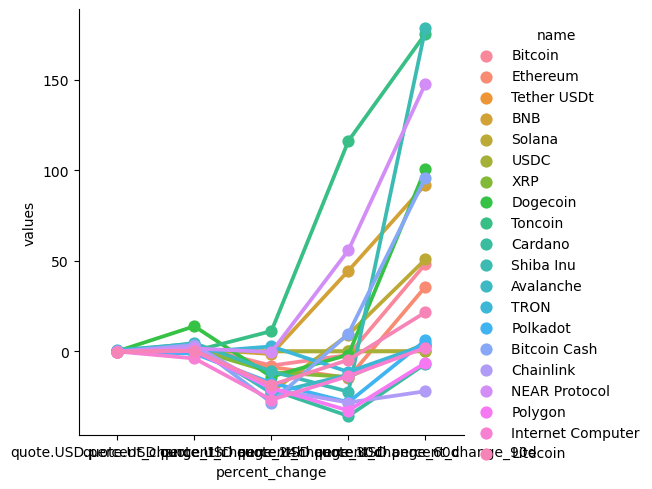

In [75]:
sns.catplot(x='percent_change',y='values',hue='name',data=my_df2,kind='point')

In [79]:
#i change the name because it's not cleary while the visualization
my_df2['percent_change']=my_df2['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','30d','60d','90d'])	
my_df2

,name,percent_change,values
0,Bitcoin,1h,-0.03654
1,Bitcoin,24h,2.75317
2,Bitcoin,30d,-7.85441
3,Bitcoin,60d,-2.05644
4,Bitcoin,90d,48.27040
5,Ethereum,1h,-0.07302
6,Ethereum,24h,1.51046
7,Ethereum,30d,-8.69117
8,Ethereum,60d,-14.65675
9,Ethereum,90d,35.69537


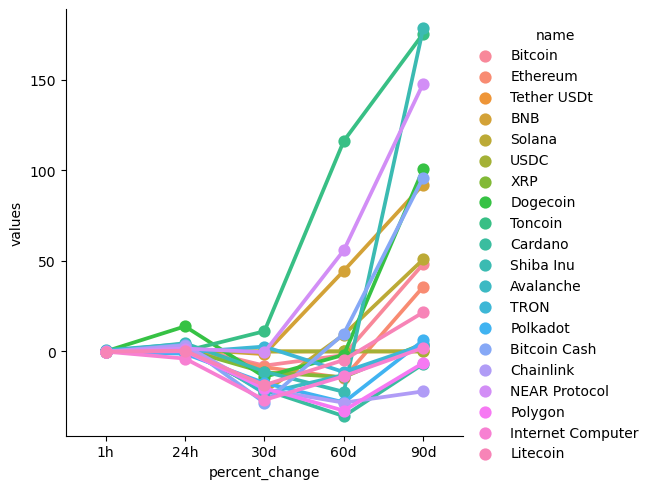

In [82]:
sns.catplot(x='percent_change',y='values',hue='name',data=my_df2,kind='point')
#ce schema represent les donnes que j'ai enregistre dans mon fichier api.csv  à 18:17 et 18:21 à 18:25

In [88]:
#visualisation en fonction du name(nom) du quite.USD.price(prix) et du timeStamp(l'heure à laquel download)
dframe=my_df[['name','quote.USD.price','timeStamp']]
dframe=dframe.query("name=='Bitcoin'")
dframe




,name,quote.USD.price,timeStamp
0,Bitcoin,63492.14177,2024-05-04 18:17:54.966225
20,Bitcoin,63547.98667,2024-05-04 18:21:11.530883
40,Bitcoin,63544.28291,2024-05-04 18:22:13.664119
60,Bitcoin,63555.40497,2024-05-04 18:23:15.789738
80,Bitcoin,63580.44469,2024-05-04 18:24:18.140738
100,Bitcoin,63585.36223,2024-05-04 18:25:21.112917


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timeStamp', ylabel='quote.USD.price'>

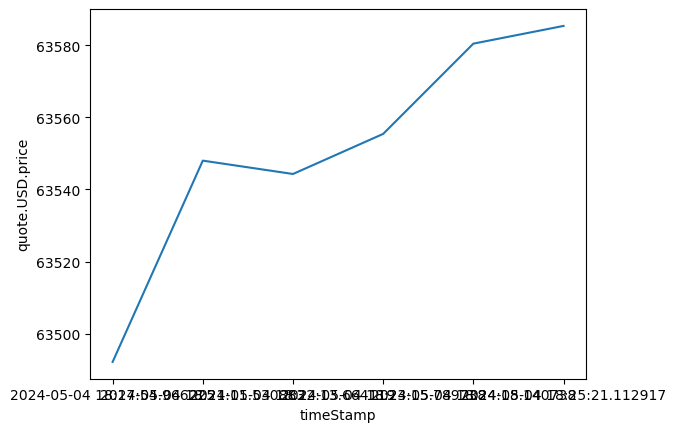

In [89]:
sns.lineplot(x='timeStamp',y='quote.USD.price',data=dframe)

In [94]:
dframe['timeStamp']=dframe['timeStamp'].replace(['2024-05-04 18:17:54.966225','2024-05-04 18:21:11.530883','2024-05-04 18:22:13.664119','2024-05-04 18:23:15.789738','2024-05-04 18:24:18.140738','2024-05-04 18:25:21.112917'],['18:17:54','18:21:11','18:22:13','18:23:15','18:24:18','18:25:21'])
dframe

,name,quote.USD.price,timeStamp
0,Bitcoin,63492.14177,18:17:54
20,Bitcoin,63547.98667,18:21:11
40,Bitcoin,63544.28291,18:22:13
60,Bitcoin,63555.40497,18:23:15
80,Bitcoin,63580.44469,18:24:18
100,Bitcoin,63585.36223,18:25:21


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timeStamp', ylabel='quote.USD.price'>

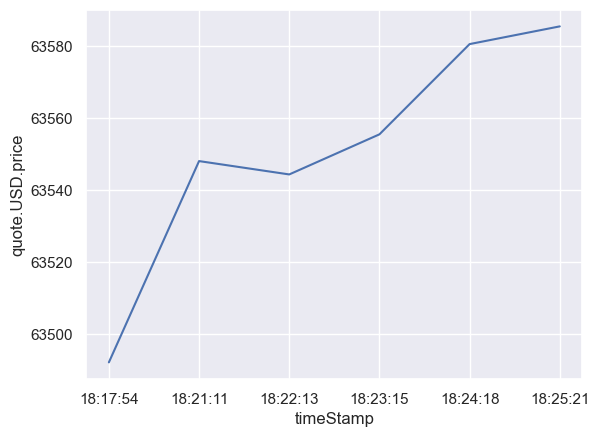

In [96]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timeStamp',y='quote.USD.price',data=dframe)

In [101]:
dframe1=my_df[['name','quote.USD.price','timeStamp']]
dframe1=dframe1.query("name=='Cardano'")
dframe1

,name,quote.USD.price,timeStamp
9,Cardano,0.46824,2024-05-04 18:17:54.966225
29,Cardano,0.46838,2024-05-04 18:21:11.530883
49,Cardano,0.46868,2024-05-04 18:22:13.664119
69,Cardano,0.46868,2024-05-04 18:23:15.789738
89,Cardano,0.46871,2024-05-04 18:24:18.140738
109,Cardano,0.46882,2024-05-04 18:25:21.112917


In [102]:
dframe1['timeStamp']=dframe1['timeStamp'].replace(['2024-05-04 18:17:54.966225','2024-05-04 18:21:11.530883','2024-05-04 18:22:13.664119','2024-05-04 18:23:15.789738','2024-05-04 18:24:18.140738','2024-05-04 18:25:21.112917'],['18:17:54','18:21:11','18:22:13','18:23:15','18:24:18','18:25:21'])
dframe1

,name,quote.USD.price,timeStamp
9,Cardano,0.46824,18:17:54
29,Cardano,0.46838,18:21:11
49,Cardano,0.46868,18:22:13
69,Cardano,0.46868,18:23:15
89,Cardano,0.46871,18:24:18
109,Cardano,0.46882,18:25:21


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timeStamp', ylabel='quote.USD.price'>

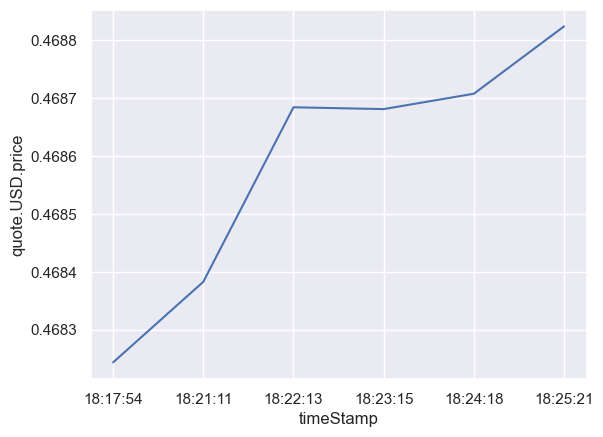

In [106]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timeStamp',y='quote.USD.price', data=dframe1)